## 🧩 Shared Notebook: Manual vs Statsmodels Power Analysis

In [1]:
# Setup and Imports
import numpy as np
from pathlib import Path
import pandas as pd
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.power_utils import (
    compute_power_z,
    compute_power_t,
    statsmodels_power,
    compute_cohens_d
)

from utils.viz_utils import (
    plot_power_curve,
    save_and_show_plot
)

# Constants
EXPORT_PLOTS = Path("../exports/plots/shared_power")  
EXPORT_TABLES = Path("../exports/tables/shared_power")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)


## 🔹 Step 1: Define Summary Parameters

In [2]:
mean_observed = 74.2
mean_expected = 70.0
std_dev = 10.0
n = 40
alpha = 0.05

# Calculate effect size (Cohen's d)
d = compute_cohens_d(mean_observed, mean_expected, std_dev)
print(f"Cohen's d: {d:.3f}")

Cohen's d: 0.420


## 🔹 Step 2: Compute Power Manually (Z-test and T-test)

In [3]:
power_z = compute_power_z(d, alpha=alpha, n=n)
power_t = compute_power_t(d, alpha=alpha, n=n)

print(f"Manual Power (Z-test): {power_z:.4f}")
print(f"Manual Power (T-test): {power_t:.4f}")

Manual Power (Z-test): 0.7569
Manual Power (T-test): 0.7350


## 🔹 Step 3: Compute Power Using Statsmodels

In [4]:
sm_power = statsmodels_power(effect_size=d, alpha=alpha, n=n)
print(f"Statsmodels Power: {sm_power:.4f}")

Statsmodels Power: 0.7358


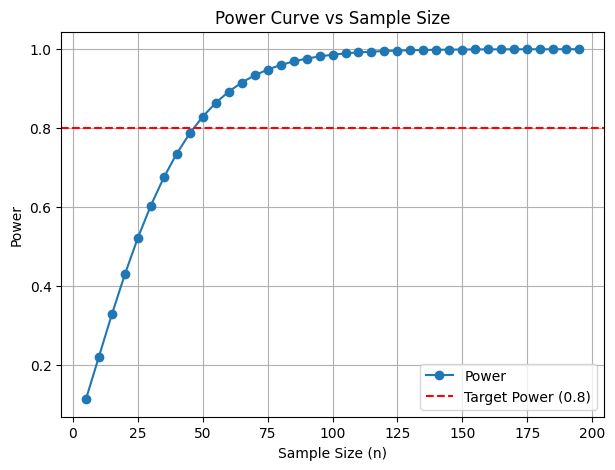

In [5]:
# Generate power values for a range of sample sizes
sample_sizes = np.arange(5, 200, 5)
power_curve = [statsmodels_power(effect_size=d, alpha=alpha, n=n) for n in sample_sizes]

fig_power = plot_power_curve(sample_sizes, power_curve, alpha=alpha)
save_and_show_plot(fig_power, EXPORT_PLOTS / "power_curve.png")

In [6]:
#  One-Tailed vs Two-Tailed Power 
power_z_one = compute_power_z(d, alpha=alpha, n=n, two_tailed=False)
power_t_one = compute_power_t(d, alpha=alpha, n=n, two_tailed=False)

print(f"Manual Power (One-tailed Z-test): {power_z_one:.4f}")
print(f"Manual Power (One-tailed T-test): {power_t_one:.4f}")

Manual Power (One-tailed Z-test): 0.8441
Manual Power (One-tailed T-test): 0.8313


In [7]:
# Extended Results Table Export

df_power = pd.DataFrame({
    "Method": ["Manual Z-test (2-tailed)", "Manual T-test (2-tailed)",
               "Manual Z-test (1-tailed)", "Manual T-test (1-tailed)", "Statsmodels"],
    "Power": [power_z, power_t, power_z_one, power_t_one, sm_power]
})
df_power.to_csv(EXPORT_TABLES / "power_comparison.csv", index=False)
display(df_power)


,Method,Power
0,Manual Z-test (2-tailed),0.756895
1,Manual T-test (2-tailed),0.734987
2,Manual Z-test (1-tailed),0.844102
3,Manual T-test (1-tailed),0.831342
4,Statsmodels,0.735805


In [8]:
# Add Effect Size Interpretation Table
effect_interpretation = pd.DataFrame({
    "Cohen's d": [0.2, 0.5, 0.8],
    "Interpretation": ["Small effect", "Medium effect", "Large effect"]
})
effect_interpretation.to_csv(EXPORT_TABLES / "effect_size_interpretation.csv", index=False)
display(effect_interpretation)


,Cohen's d,Interpretation
0,0.2,Small effect
1,0.5,Medium effect
2,0.8,Large effect


In [9]:
# Save all power results in one combined CSV
combined_results = pd.concat([df_power, effect_interpretation], axis=0)
combined_results.to_csv(EXPORT_TABLES / "power_analysis_summary_full.csv", index=False)
display(combined_results)

,Method,Power,Cohen's d,Interpretation
0,Manual Z-test (2-tailed),0.756895,NaN,NaN
1,Manual T-test (2-tailed),0.734987,NaN,NaN
2,Manual Z-test (1-tailed),0.844102,NaN,NaN
3,Manual T-test (1-tailed),0.831342,NaN,NaN
4,Statsmodels,0.735805,NaN,NaN
0,NaN,NaN,0.2,Small effect
1,NaN,NaN,0.5,Medium effect
2,NaN,NaN,0.8,Large effect


## 🧠 Key Takeaways
- **Cohen’s d** is used to standardize the effect size across tests.
- **Manual power calculations** use properties of the normal or t-distribution.
- `statsmodels` provides a validated API to calculate power more robustly.
- **Power comparison** helps validate your manual intuition and confirms implementation correctness.

## ✅ Summary
In this shared notebook, we:

- Used synthetic summary values to estimate power
- Computed power manually for Z-test and T-test scenarios
- Compared against statsmodels’ built-in power analysis
- Exported comparison table for validation